Project Instructions
Analyze Nobel Prize winner data and identify patterns by answering the following questions:

What is the most commonly awarded gender and birth country?

Store your answers as string variables top_gender and top_country.
Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

Store this as an integer called max_decade_usa.
Which decade and Nobel Prize category combination had the highest proportion of female laureates?

Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.
Who was the first woman to receive a Nobel Prize, and in what category?

Save your string answers as first_woman_name and first_woman_category.
Which individuals or organizations have won more than one Nobel Prize throughout the years?

Store the full names in a list named repeat_list.

#### Step 1 : Imports

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Step 2: Read CSV

In [7]:
nobel_data = pd.read_csv('nobel.csv')
print(nobel_data.head())

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

#### step 3: filter data

##### Performing normalization on data

In [9]:
nobel_data['birth_country'] = nobel_data['birth_country'].replace({
    'United States of America': 'USA',
    'United States': 'USA'
})
nobel_data['decade'] = (nobel_data['year'] // 10) * 10

##### Q1 : What is the most commonly awarded gender and birth country?

In [10]:
top_gender = nobel_data['sex'].mode()[0]
top_country = nobel_data['birth_country'].mode()[0]


##### Q2 : Decade with the highest ratio of US-born Nobel Prize winners to total winners

In [11]:
us_winners = nobel_data[nobel_data['birth_country'] == 'USA']
us_winners_count = us_winners.groupby('decade').size()
total_winners_count = nobel_data.groupby('decade').size()
decade_ratio_series = us_winners_count / total_winners_count
max_decade_usa = int(decade_ratio_series.idxmax())

##### Q3 :  Decade and Nobel Prize category combination with the highest proportion of female laureates

In [12]:
female_data = nobel_data[nobel_data['sex'] == 'Female']
female_proportion = (female_data.groupby(['decade', 'category']).size() / nobel_data.groupby(['decade', 'category']).size()).idxmax()
max_female_dict = {female_proportion[0]: female_proportion[1]}

##### Q4 : First woman to receive a Nobel Prize and the category

In [13]:
first_woman = female_data.sort_values(by='year').iloc[0]
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']

##### Q5 : Individuals or organizations that have won more than one Nobel Prize

In [14]:
repeat_winners = nobel_data['full_name'].value_counts()[nobel_data['full_name'].value_counts() > 1].index.tolist()
repeat_list = repeat_winners

##### Optional : Data output for validation check

In [19]:
print(f"Most commonly awarded gender: {top_gender}")
print(f"Most commonly awarded birth country: {top_country}")
print(f"Decade with the highest ratio of US-born winners: {max_decade_usa}")
print(f"Decade and category with highest proportion of female laureates: {max_female_dict}")
print(f"First woman to receive a Nobel Prize: {first_woman_name}")
print(f"Category of the first woman Nobel Prize winner: {first_woman_category}")
print(f"Individuals or organizations with more than one Nobel Prize: {repeat_list}")

Most commonly awarded gender: Male
Most commonly awarded birth country: USA
Decade with the highest ratio of US-born winners: 2000
Decade and category with highest proportion of female laureates: {np.int64(2020): 'Literature'}
First woman to receive a Nobel Prize: Marie Curie, née Sklodowska
Category of the first woman Nobel Prize winner: Physics
Individuals or organizations with more than one Nobel Prize: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'Marie Curie, née Sklodowska', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger']


## Visualization using Seaborn
#### Gender distribution

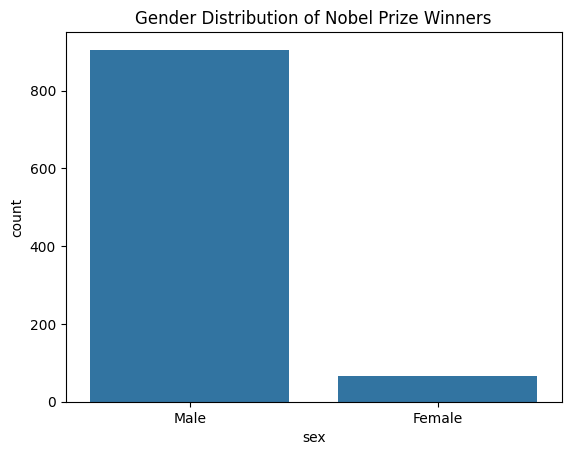

In [15]:
sns.countplot(data=nobel_data, x='sex')
plt.title('Gender Distribution of Nobel Prize Winners')
plt.show()

#### Country distribution

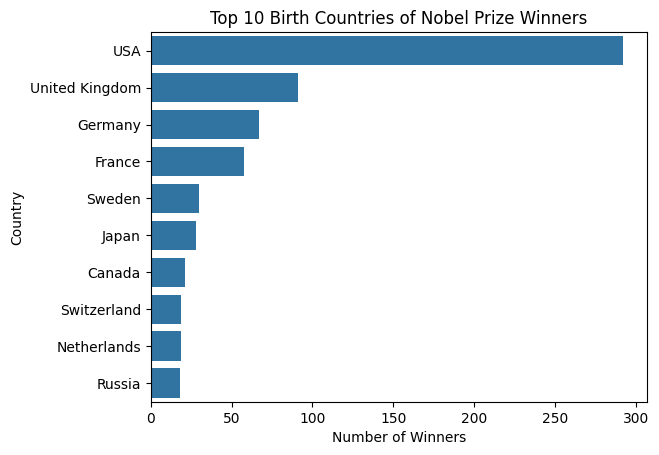

In [16]:
top_countries = nobel_data['birth_country'].value_counts().nlargest(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Birth Countries of Nobel Prize Winners')
plt.xlabel('Number of Winners')
plt.ylabel('Country')
plt.show()

#### Decade distribution of US winners

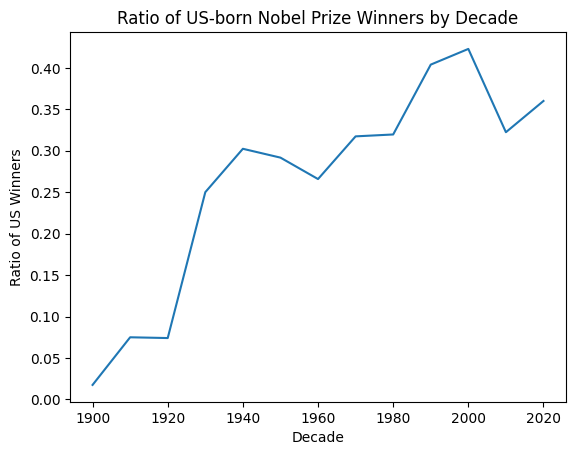

In [17]:
us_winners_by_decade = us_winners['decade'].value_counts().sort_index()
total_winners_by_decade = nobel_data['decade'].value_counts().sort_index()
us_ratio_by_decade = us_winners_by_decade / total_winners_by_decade

sns.lineplot(data=us_ratio_by_decade)
plt.title('Ratio of US-born Nobel Prize Winners by Decade')
plt.xlabel('Decade')
plt.ylabel('Ratio of US Winners')
plt.show()

#### Proportion of female laureates by decade and category

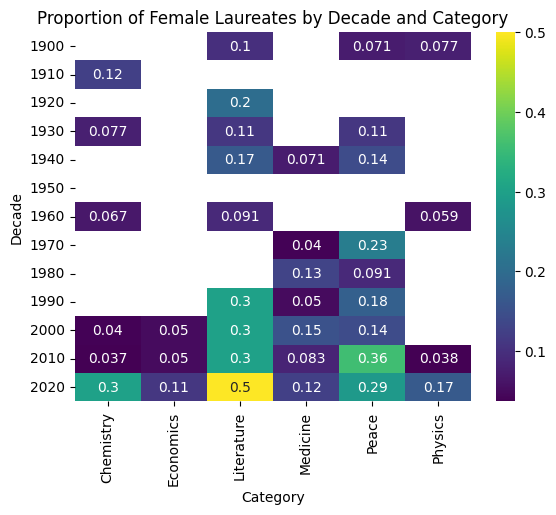

In [18]:
female_proportion_by_decade_category = (female_data.groupby(['decade', 'category']).size() / nobel_data.groupby(['decade', 'category']).size()).unstack()
sns.heatmap(female_proportion_by_decade_category, annot=True, cmap='viridis')
plt.title('Proportion of Female Laureates by Decade and Category')
plt.xlabel('Category')
plt.ylabel('Decade')
plt.show()